## Test PSF measurement in the stack

and test ZOGY using measured PSFs

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import multiprocessing
from joblib import Parallel, delayed
num_cores = multiprocessing.cpu_count()
if num_cores == 32:
    num_cores = 24  # lsst-dev - don't use all the cores, man.
elif num_cores == 8:
    num_cores = 3
elif num_cores == 4:
    num_cores = 2
print num_cores

import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

class sizeme():
    """ Class to change html fontsize of object's representation"""
    def __init__(self,ob, size=50, height=120):
        self.ob = ob
        self.size = size
        self.height = height
    def _repr_html_(self):
        repl_tuple = (self.size, self.height, self.ob._repr_html_())
        return u'<span style="font-size:{0}%; line-height:{1}%">{2}</span>'.format(*repl_tuple)

pd.options.display.max_columns = 9999
pd.set_option('display.width', 9999)

import warnings
warnings.filterwarnings('ignore')

3


Make a couple of test images to test the PSF measurement on...

In [2]:
import diffimTests as dit
reload(dit)

# Let's try w same parameters as ZOGY paper.
sky = 300.

testObj = dit.DiffimTest(imSize=(512,512), sky=sky, psf1=[1.6,1.6], psf2=[1.8,2.2],
                         offset=[0,0], psf_yvary_factor=0., 
                         varFlux2=[1500., 1600., 1800., 2000., 2200., 2400., 2600., 2800.],
                         variablesNearCenter=False,
                         theta1=0., theta2=-45., im2background=0., n_sources=50, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=21)
testObj.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 0, 'FP': 0, 'TP': 8},
 'SZOGY': {'FN': 1, 'FP': 2, 'TP': 7},
 'ZOGY': {'FN': 0, 'FP': 0, 'TP': 8}}

In [3]:
reload(dit)
res = dit.measurePsf(testObj.im1.asAfwExposure(), measurePsfAlg='psfex')
testObj.im1.psf = res.psf.computeImage().getArray()

res = dit.measurePsf(testObj.im2.asAfwExposure(), measurePsfAlg='psfex')
testObj.im2.psf = res.psf.computeImage().getArray()

testObj.reset()
testObj.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 0, 'FP': 0, 'TP': 8},
 'SZOGY': {'FN': 1, 'FP': 37, 'TP': 7},
 'ZOGY': {'FN': 1, 'FP': 57, 'TP': 7}}

In [52]:
reload(dit)
res = dit.measurePsf(testObj.im1.asAfwExposure(), measurePsfAlg='psfex')
testObj.im1.psf = dit.afwPsfToArray(res.psf, testObj.im1.asAfwExposure())

res = dit.measurePsf(testObj.im2.asAfwExposure(), measurePsfAlg='psfex')
testObj.im2.psf = dit.afwPsfToArray(res.psf, testObj.im2.asAfwExposure())

testObj.reset()
testObj.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 0, 'FP': 0, 'TP': 8},
 'SZOGY': {'FN': 1, 'FP': 8, 'TP': 7},
 'ZOGY': {'FN': 1, 'FP': 8, 'TP': 7}}

See how it works on a crowded field.

In [64]:
reload(dit)
testObj2 = dit.DiffimTest(imSize=(512,512), sky=sky, psf1=[1.6,1.6], psf2=[1.8,2.2],
                         offset=[0,0], psf_yvary_factor=0., 
                         varFlux2=[1500., 1600., 1800., 2000., 2200., 2400., 2600., 2800.],
                         variablesNearCenter=False,
                         theta1=0., theta2=-45., im2background=0., n_sources=500, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=21)
testObj2.psf1_orig = testObj2.im1.psf
testObj2.psf2_orig = testObj2.im2.psf
testObj2.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 0, 'FP': 0, 'TP': 8},
 'SZOGY': {'FN': 0, 'FP': 0, 'TP': 8},
 'ZOGY': {'FN': 0, 'FP': 0, 'TP': 8}}

In [65]:
res = dit.measurePsf(testObj2.im1.asAfwExposure(), measurePsfAlg='psfex')
testObj2.im1.psf = res.psf.computeImage().getArray()

res = dit.measurePsf(testObj2.im2.asAfwExposure(), measurePsfAlg='psfex')
testObj2.im2.psf = res.psf.computeImage().getArray()

testObj2.reset()
testObj2.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 0, 'FP': 0, 'TP': 8},
 'SZOGY': {'FN': 2, 'FP': 17, 'TP': 6},
 'ZOGY': {'FN': 3, 'FP': 44, 'TP': 5}}

In [66]:
reload(dit)
res = dit.measurePsf(testObj2.im1.asAfwExposure(), measurePsfAlg='psfex')
testObj2.im1.psf = dit.afwPsfToArray(res.psf, testObj2.im1.asAfwExposure())

res = dit.measurePsf(testObj2.im2.asAfwExposure(), measurePsfAlg='psfex')
testObj2.im2.psf = dit.afwPsfToArray(res.psf, testObj2.im2.asAfwExposure())

testObj2.reset()
testObj2.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 0, 'FP': 0, 'TP': 8},
 'SZOGY': {'FN': 2, 'FP': 41, 'TP': 6},
 'ZOGY': {'FN': 3, 'FP': 41, 'TP': 5}}

0.0722311288118 0.0621698996453
0.999999356258 1.0


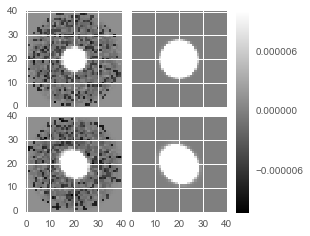

In [77]:
print testObj2.im1.psf.max(), testObj2.psf1_orig.max()
print testObj2.im1.psf.sum(), testObj2.psf1_orig.sum()
dit.plotImageGrid((testObj2.im1.psf, testObj2.psf1_orig, testObj2.im2.psf, testObj2.psf2_orig))

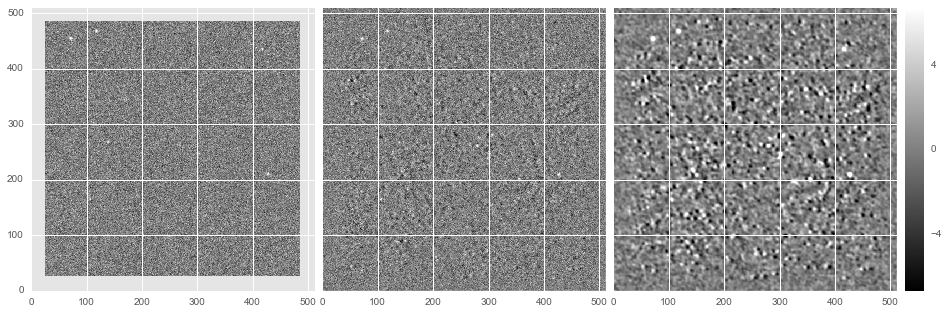

In [68]:
fig = plt.figure(1, (16, 16))
obj = testObj2
dit.plotImageGrid((obj.res.decorrelatedDiffim, obj.D_ZOGY.im, obj.S_corr_ZOGY.im))

Finally a very crowded field!

In [19]:
reload(dit)
testObj3 = dit.DiffimTest(imSize=(512,512), sky=sky, psf1=[1.6,1.6], psf2=[1.8,2.2],
                         offset=[0,0], psf_yvary_factor=0., 
                         varFlux2=[1500., 1600., 1800., 2000., 2200., 2400., 2600., 2800.],
                         variablesNearCenter=False,
                         theta1=0., theta2=-45., im2background=0., n_sources=5000, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=21)
testObj3.psf1_orig = testObj3.im1.psf
testObj3.psf2_orig = testObj3.im2.psf
testObj3.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 1, 'FP': 0, 'TP': 7},
 'SZOGY': {'FN': 2, 'FP': 5, 'TP': 6},
 'ZOGY': {'FN': 1, 'FP': 0, 'TP': 7}}

In [21]:
res = dit.measurePsf(testObj3.im1.asAfwExposure(), measurePsfAlg='psfex')
testObj3.im1.psf = res.psf.computeImage().getArray()

res = dit.measurePsf(testObj3.im2.asAfwExposure(), measurePsfAlg='psfex')
testObj3.im2.psf = res.psf.computeImage().getArray()

testObj3.reset()
testObj3.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 1, 'FP': 0, 'TP': 7},
 'SZOGY': {'FN': 8, 'FP': 1, 'TP': 0},
 'ZOGY': {'FN': 8, 'FP': 18, 'TP': 0}}

In [14]:
reload(dit)
res = dit.measurePsf(testObj3.im1.asAfwExposure(), measurePsfAlg='psfex')
testObj3.im1.psf = dit.afwPsfToArray(res.psf, testObj3.im1.asAfwExposure())

res = dit.measurePsf(testObj3.im2.asAfwExposure(), measurePsfAlg='psfex')
testObj3.im2.psf = dit.afwPsfToArray(res.psf, testObj3.im2.asAfwExposure())

testObj3.reset()
testObj3.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 1, 'FP': 0, 'TP': 7},
 'SZOGY': {'FN': 8, 'FP': 0, 'TP': 0},
 'ZOGY': {'FN': 8, 'FP': 13, 'TP': 0}}

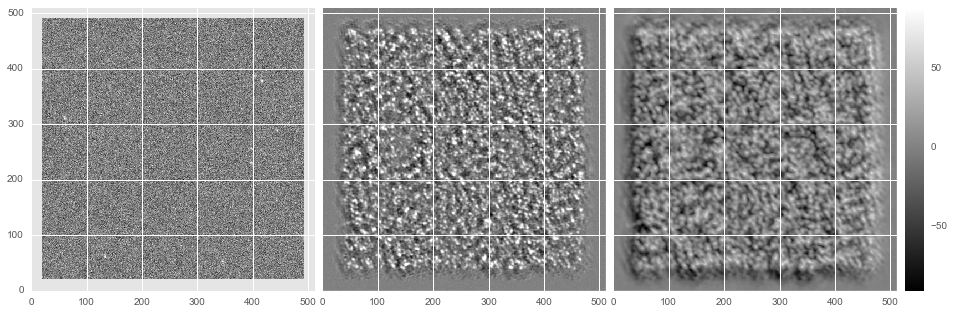

In [59]:
fig = plt.figure(1, (16, 16))
obj = testObj3
dit.plotImageGrid((obj.res.decorrelatedDiffim, obj.D_ZOGY.im, obj.S_corr_ZOGY.im))

There are issues with calling `psf.computeImage()`. That uses psf.getAveragePosition() by default which is the average of positions of stars that were used to measure the PSF. Even for small offsets (apparently only 20-30 pixels) this can lead to offsets in the PSF in the output image. This is shown below.

(252.77, 254.7)
256.0 256.0


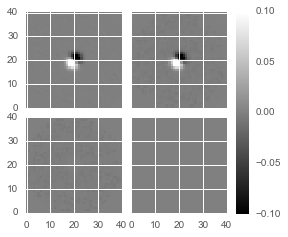

In [88]:
obj = testObj2
psf2 = obj.psf1_orig

res = dit.measurePsf(obj.im1.asAfwExposure(), measurePsfAlg='psfex')
print res.psf.getAveragePosition()
tmp1 = res.psf.computeImage().getArray()
tmp1 /= tmp1.max()

import lsst.afw.geom as afwGeom
img = obj.res.decorrelatedDiffim
bbox = img.getBBox()
xcen = (bbox.getBeginX() + bbox.getEndX()) / 2.
ycen = (bbox.getBeginY() + bbox.getEndY()) / 2.
print xcen, ycen
tmp2 = res.psf.computeImage(afwGeom.Point2D(xcen, ycen)).getArray()
tmp2 /= tmp2.max()
tmp3 = dit.afwPsfToArray(res.psf, obj.im1.asAfwExposure())
tmp3 /= tmp3.max()
dit.plotImageGrid((tmp1 - tmp2, tmp1-psf2/psf2.max(), tmp3-psf2/psf2.max(), tmp3-obj.im1.psf/obj.im1.psf.max()), 
                  clim=(-0.1,0.1))

In [89]:
sh = dit.arrayToAfwPsf(testObj2.psf1_orig).computeShape()
print [sh.getDeterminantRadius(), sh.getIxx(), sh.getIyy(), sh.getIxy()]
print dit.computeMoments(testObj2.psf1_orig)
sh = dit.afwPsfToShape(res.psf, obj.im1.asAfwExposure())
print [sh.getDeterminantRadius(), sh.getIxx(), sh.getIyy(), sh.getIxy()]
print dit.computeMoments(dit.afwPsfToArray(res.psf, obj.im1.asAfwExposure()))

[1.5999732062394578, 2.5599142606841707, 2.5599142606841707, 0.0]
(20.0, 20.000000000000004)
[1.5955657979980766, 2.548277101785016, 2.543387155722018, 0.001939721489219229]
(20.079280348226085, 19.980149486490895)


(255.97, 253.56)
256.0 256.0


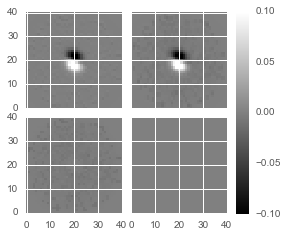

In [84]:
obj = testObj2
psf2 = obj.psf2_orig

res = dit.measurePsf(obj.im2.asAfwExposure(), measurePsfAlg='psfex')
print res.psf.getAveragePosition()
tmp1 = res.psf.computeImage().getArray()
tmp1 /= tmp1.max()

import lsst.afw.geom as afwGeom
img = obj.res.decorrelatedDiffim
bbox = img.getBBox()
xcen = (bbox.getBeginX() + bbox.getEndX()) / 2.
ycen = (bbox.getBeginY() + bbox.getEndY()) / 2.
print xcen, ycen
tmp2 = res.psf.computeImage(afwGeom.Point2D(xcen, ycen)).getArray()
tmp2 /= tmp2.max()
tmp3 = dit.afwPsfToArray(res.psf, obj.im2.asAfwExposure())
tmp3 /= tmp3.max()
dit.plotImageGrid((tmp1 - tmp2, tmp1-psf2/psf2.max(), tmp3-psf2/psf2.max(), tmp3-obj.im2.psf/obj.im2.psf.max()), 
                  clim=(-0.1,0.1))

0.0479723922908 0.0401906421949
1.00000019158 1.0


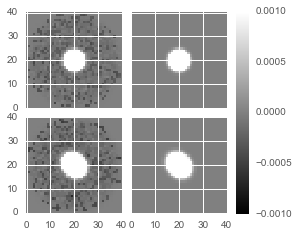

In [85]:
print testObj2.im2.psf.max(), testObj2.psf2_orig.max()
print testObj2.im2.psf.sum(), testObj2.psf2_orig.sum()
dit.plotImageGrid((testObj2.im1.psf, testObj2.psf1_orig, testObj2.im2.psf, testObj2.psf2_orig), clim=(-0.001,0.001))

[1.989961637274519, 4.039946238041112, 4.039946238041112, -0.799989278877403]
(20.0, 20.000000000000004)
[1.9720750897844168, 3.971511640609692, 3.9634502761008146, -0.7848212659993815]
(20.023956000654419, 19.959110121189269)


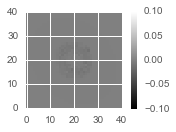

In [86]:
sh = dit.arrayToAfwPsf(testObj2.psf2_orig).computeShape()
print [sh.getDeterminantRadius(), sh.getIxx(), sh.getIyy(), sh.getIxy()]
print dit.computeMoments(testObj2.psf2_orig)
sh = dit.afwPsfToShape(res.psf, obj.im2.asAfwExposure())
print [sh.getDeterminantRadius(), sh.getIxx(), sh.getIyy(), sh.getIxy()]
print dit.computeMoments(dit.afwPsfToArray(res.psf, obj.im2.asAfwExposure()))

moments = dit.computeMoments(tmp3)
sh = dit.arrayToAfwPsf(tmp3).computeShape()
xgrid, ygrid = np.meshgrid(np.arange(0, psf2.shape[0]), np.arange(psf2.shape[1]))
rad = np.sqrt((xgrid - moments[0])**2 + (ygrid - moments[1])**2)
tmp3a = tmp3.copy()
tmp3a[(rad > sh.getDeterminantRadius() * 4.) | (np.abs(tmp3a) <= 1e-3)] = 0.
dit.plotImageGrid((tmp3a - psf2/psf2.max(),), clim=(-0.1,0.1))

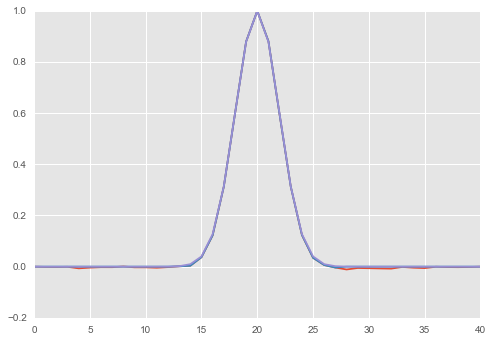

In [87]:
plt.plot(tmp3[20,:])
plt.plot(tmp3a[20,:])
plt.plot(psf2[20,:]/psf2.max())

OK, I just showed that the fitted PSFs for testObj2 are good. So why is the diffim so crappy?